In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"../data/marketingcampaigns.csv", sep=',', on_bad_lines='skip')

In [3]:
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.00
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.00


In [4]:
df.info

<bound method DataFrame.info of                                       campaign_name  start_date    end_date  \
0               Public-key multi-tasking throughput  2023-04-01  2024-02-23   
1                De-engineered analyzing task-force  2023-02-15  2024-04-22   
2     Balanced solution-oriented Local Area Network  2022-12-20  2023-10-11   
3                 Distributed real-time methodology  2022-09-26  2023-09-27   
4               Front-line executive infrastructure  2023-07-07  2024-05-15   
...                                             ...         ...         ...   
1027                            No revenue campaign  2023-02-01  2023-08-01   
1028                                    Random mess  2023-06-06         NaN   
1029                                 Invalid budget  2022-12-01  2023-06-01   
1030                              Overlapping dates  2023-03-01  2022-12-31   
1031                           Too many conversions  2023-05-01  2023-11-01   

        budget   ro

In [5]:
df.head(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10


In [6]:
df.shape #filas y columnas

(1032, 10)

In [7]:
df.columns #columnas

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue'],
      dtype='object')

In [8]:
df.isnull().sum() #suma de los valores nulos por columna

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100    #proporcion de los valores nulos por columna

campaign_name      0.000000
start_date         0.096899
end_date           0.193798
budget             0.290698
roi                0.387597
type               0.096899
target_audience    0.193798
channel            0.096899
conversion_rate    0.387597
revenue            0.290698
dtype: float64

In [10]:
df.duplicated() #verifica si hay filas duplicadas

0       False
1       False
2       False
3       False
4       False
        ...  
1027    False
1028    False
1029    False
1030    False
1031    False
Length: 1032, dtype: bool

In [11]:
df.duplicated().sum() #suma de los valores duplicados por fila

np.int64(15)

In [12]:
df = df.drop_duplicates() #elimina filas duplicadas

In [13]:
df.duplicated().sum() #suma de los valores duplicados por fila

np.int64(0)

<Axes: >

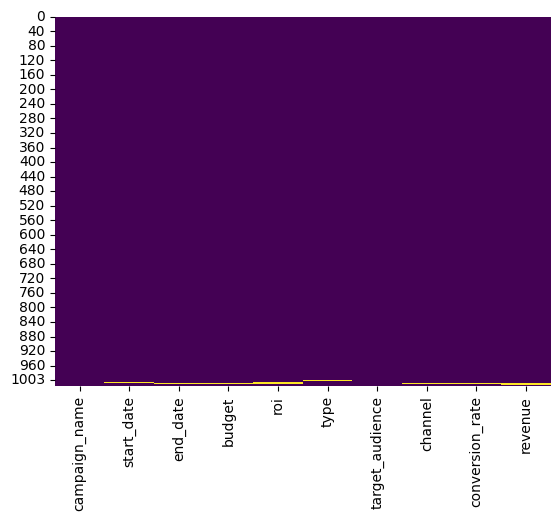

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #grafica de los valores nulos

In [15]:
df['start_date'].isnull().sum() #verifico que ya no hay valores nulos en el dataframe 

np.int64(1)

In [16]:
df['end_date'].isnull().sum()

np.int64(2)

In [17]:
#. Normalizar decimales (roi y conversion_rate)
def normalize_decimal(value):
    value = str(value).replace('%', '').replace(',', '.')
    try:
        return float(value)
    except:
        return None

df['roi'] = df['roi'].apply(normalize_decimal)
df['conversion_rate'] = df['conversion_rate'].apply(normalize_decimal)


In [18]:
# Limpiar budget y revenue para quitar símbolos y convertir a números
import re

def clean_currency(value):
    value = str(value)
    # Quitar cualquier símbolo no numérico o decimal
    value = re.sub(r'[^\d,\.]', '', value)
    # Convertir coma a punto si hay solo una coma
    if value.count(',') == 1 and value.count('.') == 0:
        value = value.replace(',', '.')
    # Quitar separadores de miles si es necesario
    if value.count('.') > 1:
        value = value.replace('.', '').replace(',', '.')
    elif value.count(',') > 1:
        value = value.replace(',', '')
    try:
        return float(value)
    except:
        return None

df['budget'] = df['budget'].apply(clean_currency)
df['revenue'] = df['revenue'].apply(clean_currency)


In [19]:
#Verificar unidad de conversion_rate
df['conversion_rate'] = df['conversion_rate'].apply(lambda x: x*100 if x <= 1 else x)


In [20]:
#Validaciones
print(df.dtypes)
print(df.isnull().sum())


campaign_name       object
start_date          object
end_date            object
budget             float64
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object
campaign_name      0
start_date         1
end_date           2
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64


In [21]:
#Normalización y Validación de Datos
# 1. Normalización de decimales y valores numéricos
def normalize_decimal(value):
    if pd.isna(value):
        return None
    try:
        # Eliminar símbolos y convertir a float
        value = str(value).replace('%', '').replace('$', '').strip()
        # Manejar diferentes formatos de decimal
        if ',' in value and '.' in value:
            value = value.replace(',', '')
        elif ',' in value:
            value = value.replace(',', '.')
        return float(value)
    except:
        return None

# 2. Normalización de fechas
def normalize_dates(df):
    for col in ['start_date', 'end_date']:
        df[col] = pd.to_datetime(df[col], errors='coerce', format='%Y-%m-%d')
    return df

# 3. Aplicar normalizaciones
df['roi'] = df['roi'].apply(normalize_decimal)
df['conversion_rate'] = df['conversion_rate'].apply(normalize_decimal)
df['budget'] = df['budget'].apply(normalize_decimal)
df['revenue'] = df['revenue'].apply(normalize_decimal)

# 4. Estandarizar conversion_rate a porcentaje
df['conversion_rate'] = df['conversion_rate'].apply(lambda x: x*100 if x and x <= 1 else x)

# 5. Validaciones
def validate_data(df):
    validation_results = {
        'null_values': df.isnull().sum(),
        'data_types': df.dtypes,
        'value_ranges': {
            'roi': [df['roi'].min(), df['roi'].max()],
            'conversion_rate': [df['conversion_rate'].min(), df['conversion_rate'].max()],
            'budget': [df['budget'].min(), df['budget'].max()],
            'revenue': [df['revenue'].min(), df['revenue'].max()]
        }
    }
    return validation_results

In [22]:
#Manejo de Duplicados
def handle_duplicates(df):
    # 1. Identificar duplicados exactos
    exact_dupes = df.duplicated().sum()
    
    # 2. Identificar duplicados parciales por nombre de campaña
    campaign_dupes = df[df.duplicated(subset=['campaign_name'], keep=False)]
    
    # 3. Criterios para mantener filas en caso de duplicados
    df_clean = df.sort_values('revenue', ascending=False).drop_duplicates(
        subset=['campaign_name'], keep='first'
    )
    
    # 4. Documentar cambios
    changes = {
        'original_rows': len(df),
        'remaining_rows': len(df_clean),
        'removed_rows': len(df) - len(df_clean),
        'exact_duplicates': exact_dupes
    }
    
    return df_clean, changes

In [23]:
#3. Detección y Manejo de Outliers
def detect_outliers(df, columns=['budget', 'revenue', 'roi', 'conversion_rate']):#Define una función que recibe un DataFrame df y una lista de columnas a evaluar (por defecto: 'budget', 'revenue', 'roi', 'conversion_rate').
    outliers = {} #Crea un diccionario vacío outliers donde se almacenarán los valores atípicos por columna.
    
    #Para cada columna en la lista de columnas, calcula los cuartiles Q1 y Q3, el rango intercuartílico (IQR) y los límites inferior y superior para detectar outliers.
    #Los outliers se almacenan en el diccionario outliers, donde la clave es el nombre de la columna y el valor es un DataFrame con los valores atípicos.
    for col in columns:
        for col in columns:
            Q1 = df[col].quantile(0.25)  # Primer cuartil (25%)
            Q3 = df[col].quantile(0.75)  # Tercer cuartil (75%)
            IQR = Q3 - Q1                # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR #El IQR es una medida de dispersión que nos ayuda a identificar outliers.
        upper_bound = Q3 + 1.5 * IQR
        
        #Define los límites inferiores y superiores para considerar un valor como outlier.
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    #Filtra los valores que están fuera de esos límites (es decir, los outliers) y los guarda en el diccionario.
    return outliers

# Manejo de outliers
def handle_outliers(df, outliers):
    #Crea una copia del DataFrame original para no modificarlo directamente.
    df_clean = df.copy()
    
    #Para cada columna con outliers
    #Calcula cuántos outliers hay y sus valores mínimo y máximo. Esto puede servir para registrar o reportar.
    for col, outlier_values in outliers.items():
        # Documentar outliers antes de tratarlos
        outlier_stats = {
            'count': len(outlier_values),
            'min': outlier_values.min(),
            'max': outlier_values.max()
        }
        
        #Vuelve a calcular los límites IQR.
        #Reemplaza los valores que estén fuera de esos límites con los valores límite (boundaries) usando clip.
        # Opción 1: Recortar (capping)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean[col] = df_clean[col].clip(
            lower=Q1 - 1.5 * IQR,
            upper=Q3 + 1.5 * IQR
        )
    
    #Devuelve el DataFrame limpio y las estadísticas del último grupo de outliers procesado
    return df_clean, outlier_stats

In [24]:
def standardize_categories(df):
    # Correcciones para 'channel'
    channel_mapping = {
        'referal': 'referral',
        'organic': 'organic',
        'paid': 'paid',
        'promotion': 'promotion',
        'referral': 'referral'
    }
    # Correcciones para 'target_audience'
    audience_mapping = {
        'b2b': 'B2B',
        'b2c': 'B2C'
    }

    # Convertir a minúsculas y reemplazar según el diccionario
    df['channel'] = df['channel'].str.lower().replace(channel_mapping)
    df['target_audience'] = df['target_audience'].str.lower().replace(audience_mapping)

    print("Valores únicos en channel después de la estandarización:")
    print(df['channel'].unique())
    return df

df = standardize_categories(df)



Valores únicos en channel después de la estandarización:
['organic' 'promotion' 'paid' 'referral' nan]


In [25]:
#Enriquecimiento de Datos
def enrich_dataset(df):
    # Calcular métricas adicionales
    df['net_profit'] = df['revenue'] - df['budget']
    df['cost_per_conversion'] = df['budget'] / (df['conversion_rate'] / 100)
    
    # Extraer componentes temporales
    df['month'] = df['start_date'].dt.month
    df['quarter'] = df['start_date'].dt.quarter
    df['year'] = df['start_date'].dt.year
    
    # Categorizar rendimiento
    df['performance_category'] = pd.qcut(df['roi'], q=4, labels=['Low', 'Medium', 'High', 'Excellent'])
    
    return df

In [26]:
#Validación Final
def final_validation(df):
    # Verificar tipos de datos
    expected_types = {
        'budget': 'float64',
        'revenue': 'float64',
        'roi': 'float64',
        'conversion_rate': 'float64',
        'start_date': 'datetime64[ns]',
        'end_date': 'datetime64[ns]'
    }
    
    type_check = {col: str(df[col].dtype) == expected_types[col] 
                  for col in expected_types.keys()}
    
    # Verificar consistencia
    consistency_check = {
        'revenue_gt_budget': (df['revenue'] >= df['budget']).all(),
        'conversion_rate_range': ((df['conversion_rate'] >= 0) & 
                                (df['conversion_rate'] <= 100)).all(),
        'dates_order': (df['end_date'] >= df['start_date']).all()
    }
    
    return {'type_check': type_check, 'consistency_check': consistency_check}

In [27]:

# Encontrar filas con valores nulos en cualquier columna
filas_nulas = df[df.isnull().any(axis=1)]
print(f"Número de filas con valores nulos: {len(filas_nulas)}")

# Ver qué filas específicas tienen nulos en la columna 'start_date'
start_date_nulos = df[df['start_date'].isnull()]
print(f"\nNúmero de filas con valores nulos en 'start_date': {len(start_date_nulos)}")

# Mostrar esas filas
if not start_date_nulos.empty:
    print("\nFilas con valores nulos en 'start_date':")
    display(start_date_nulos)
# Convertir columnas de fecha a datetime
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Calcular la duración de la campaña para filas donde ambas fechas están disponibles
fechas_validas = df.dropna(subset=['start_date', 'end_date'])
duracion_campañas = (fechas_validas['end_date'] - fechas_validas['start_date']).dt.days

# Calcular la mediana de la duración de las campañas
mediana_duracion = duracion_campañas.median()
print(f"Duración mediana de campaña: {mediana_duracion} días")

# Rellenar start_date faltante donde end_date está disponible
mascara_start_faltante = df['start_date'].isna() & df['end_date'].notna()
df.loc[mascara_start_faltante, 'start_date'] = df.loc[mascara_start_faltante, 'end_date'] - pd.Timedelta(days=mediana_duracion)

# Rellenar end_date faltante donde start_date está disponible
mascara_end_faltante = df['start_date'].notna() & df['end_date'].isna()
df.loc[mascara_end_faltante, 'end_date'] = df.loc[mascara_end_faltante, 'start_date'] + pd.Timedelta(days=mediana_duracion)

# Comprobar valores nulos restantes después de rellenar
print("\nValores nulos restantes después de rellenar:")
print(df[['start_date', 'end_date']].isna().sum())

# Mostrar filas que tenían fechas rellenadas
print("\nFilas con fechas rellenadas:")
display(df.loc[filas_nulas.index])

# Comprobar filas donde ambas fechas faltan
ambas_fechas_faltan = df[(df['start_date'].isna()) & (df['end_date'].isna())]

print(f"Número de filas donde faltan ambas fechas: {len(ambas_fechas_faltan)}")

# Eliminar filas donde faltan ambas fechas
filas_antes = len(df)
df = df.dropna(subset=['start_date', 'end_date'], how='all')
filas_despues = len(df)

print(f"\nEliminadas {filas_antes - filas_despues} filas donde faltaban ambas fechas")
print(f"Forma del DataFrame después de eliminar: {df.shape}")

# Verificar que no queden filas donde faltan ambas fechas
ambas_fechas_faltan_despues = df[(df['start_date'].isna()) & (df['end_date'].isna())]
print(f"\nFilas restantes donde faltan ambas fechas: {len(ambas_fechas_faltan_despues)}")


Número de filas con valores nulos: 11

Número de filas con valores nulos en 'start_date': 1

Filas con valores nulos en 'start_date':


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1021,Cloud-based scalable solution,NaN,2023-12-31,50000.0,NaN,event,B2C,paid,30.0,120000.0


Duración mediana de campaña: 364.0 días

Valores nulos restantes después de rellenar:
start_date    1
end_date      1
dtype: int64

Filas con fechas rellenadas:


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1003,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,67.0,558302.11
1004,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,NaN,B2C,promotion,52.0,206241.46
1005,NEW CAMPAIGN - Missing Budget,2023-10-01,2024-01-15,NaN,0.25,email,B2B,organic,NaN,45000.00
1021,Cloud-based scalable solution,2023-01-01,2023-12-31,50000.00,NaN,event,B2C,paid,30.0,120000.00
1022,Broken-date campaign,2023-01-02,2024-01-01,25000.00,0.45,email,B2B,organic,NaN,87500.00
1023,Negative ROI test,2022-10-10,2023-05-05,10000.00,-0.20,podcast,B2C,referral,10.0,NaN
1024,Null-heavy campaign,2023-01-01,2023-12-31,NaN,NaN,B2B,social media,NaN,NaN,NaN
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,40.0,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,50.0,NaN
1028,Random mess,2023-06-06,2024-06-04,100000.00,NaN,podcast,NaN,referral,NaN,300000.00


Número de filas donde faltan ambas fechas: 1

Eliminadas 1 filas donde faltaban ambas fechas
Forma del DataFrame después de eliminar: (1016, 10)

Filas restantes donde faltan ambas fechas: 0


In [28]:
df['start_date'].isnull().sum()

np.int64(0)

In [29]:
df['end_date'].isnull().sum()

np.int64(0)

In [30]:
from sklearn.impute import KNNImputer

# Solo columnas numéricas para KNNImputer
numerical_columns = ['roi', 'conversion_rate', 'revenue', 'budget']

imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

print("Porcentaje de nulos después de la imputación:")
print(df[numerical_columns].isnull().sum() / df.shape[0] * 100)

df[numerical_columns].head()


Porcentaje de nulos después de la imputación:
roi                0.0
conversion_rate    0.0
revenue            0.0
budget             0.0
dtype: float64


,roi,conversion_rate,revenue,budget
0,0.35,40.0,709593.48,8082.30
1,0.74,66.0,516609.10,17712.98
2,0.37,28.0,458227.42,84643.10
3,0.47,19.0,89958.73,14589.75
4,0.30,81.0,47511.35,39291.90


In [31]:


# Para 'type', 'channel' y 'target_audience', puedes usar el valor más frecuente (moda)
for col in ['type', 'channel', 'target_audience', 'budget']:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)


In [32]:
# Ver el tipo de datos de la columna 'type'
tipo_type = df['type'].dtype
print(f'Type es: {tipo_type}')
tipo_target_audience = df['target_audience'].dtype
print(f'Target_audience es: {tipo_target_audience}')

Type es: object
Target_audience es: object


In [33]:
print(df.dtypes)

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object


In [34]:
df.isnull().sum() #verifico que ya no hay valores nulos en el dataframe limpio

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

In [35]:
df.isnull().sum() / len(df) * 100

campaign_name      0.0
start_date         0.0
end_date           0.0
budget             0.0
roi                0.0
type               0.0
target_audience    0.0
channel            0.0
conversion_rate    0.0
revenue            0.0
dtype: float64

<Axes: >

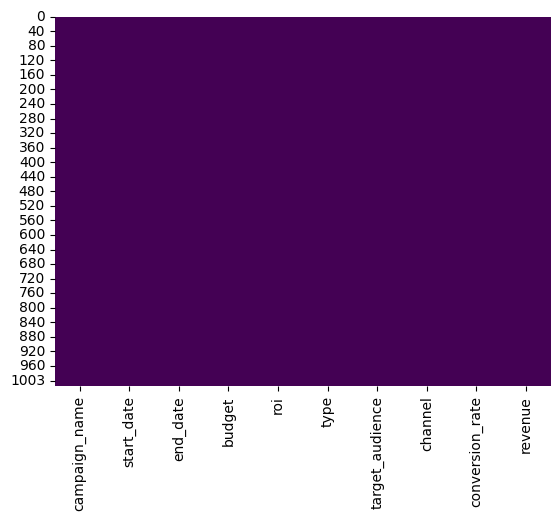

In [36]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #grafica de los valores nulos

In [37]:
print(df.columns.tolist())


['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']


In [38]:
df.columns = df.columns.str.strip() # Elimina espacios en blanco al inicio y al final de los nombres de las columnas

In [39]:
print(df.columns.tolist())

['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']


In [40]:
# sin tratar de separarlo en columnas.
with open(r"..\data\marketingcampaigns.csv", encoding='utf-8') as f:
    for i in range(10):
        print(f.readline())

campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue

Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.4,709593.48

De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.1

Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42

Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73

Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.3,social media,B2B,promotion,0.81,47511.35

Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11

Innovative context-sensitive framework,2023-03-01,2024-02-23,28964.45,0.59,email,B2C,referral,0.17,172882.59

User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.4,webinar,B2C,promotion,0.52,206241.46

Proactive neutral me

In [41]:
columnas_numericas = ['budget', 'roi', 'conversion_rate', 'revenue']

for col in columnas_numericas:
    if col in df.columns:
        print(f"✅ '{col}' está presente.")
    else:
        print(f"❌ '{col}' NO está en el DataFrame.")



✅ 'budget' está presente.
✅ 'roi' está presente.
✅ 'conversion_rate' está presente.
✅ 'revenue' está presente.


In [42]:
df['roi'] #una columna

0       0.350
1       0.740
2       0.370
3       0.470
4       0.300
        ...  
1027    0.300
1028    0.640
1029    0.402
1030    0.600
1031    0.800
Name: roi, Length: 1016, dtype: float64

In [43]:
#calcular roi
df['roi'] = (df['revenue'] - df['budget']) / df['budget']
df['roi']

0       86.795984
1       28.165567
2        4.413642
3        5.165886
4        0.209189
          ...    
1027    17.917423
1028     2.000000
1029    -0.975226
1030     0.500000
1031     2.000000
Name: roi, Length: 1016, dtype: float64

In [52]:
#roi maximo
roi_max = df['roi'].max()
roi_max

np.float64(884.7589994014651)

In [44]:
#como arreglo los valores nulos sin cargarnos los datos originales
df_limpio = df.copy() #copia del dataframe original

In [45]:
df_limpio.head(3) #verifico que la copia se haya hecho bien

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,86.795984,email,B2B,organic,40.0,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,28.165567,email,B2C,promotion,66.0,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,4.413642,podcast,B2B,paid,28.0,458227.42


In [46]:
df_limpio.isnull().sum() #verifico que ya no hay valores nulos en el dataframe limpio

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

In [47]:
df_limpio.duplicated().sum() #suma de los valores duplicados por fila

np.int64(0)

In [48]:
df_limpio

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.300,86.795984,email,B2B,organic,40.0,709593.480
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.980,28.165567,email,B2C,promotion,66.0,516609.100
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.100,4.413642,podcast,B2B,paid,28.0,458227.420
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.750,5.165886,webinar,B2B,organic,19.0,89958.730
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.900,0.209189,social media,B2B,promotion,81.0,47511.350
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000.000,17.917423,social media,B2B,organic,50.0,378348.462
1028,Random mess,2023-06-06,2024-06-04,100000.000,2.000000,podcast,B2B,referral,44.6,300000.000
1029,Invalid budget,2022-12-01,2023-06-01,2018207.422,-0.975226,email,B2C,promotion,20.0,50000.000
1030,Overlapping dates,2023-03-01,2022-12-31,60000.000,0.500000,webinar,B2B,paid,70.0,90000.000


In [49]:
df_limpio.to_csv(r'../data/marketingcampaigns_limpio.csv',index=False) #guardo el dataframe limpio en un nuevo archivo csv

In [50]:
print("Número de filas:", len(df_limpio))

Número de filas: 1016


In [51]:
print("Número de filas:", len(df))

Número de filas: 1016
